In [7]:
# prompt: import the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# prompt: load the dataset

data = pd.read_csv('sentiment_analysis.csv') # Replace 'your_dataset.csv' with the actual file name


In [9]:
# prompt: read the data set

# Assuming the dataset is already uploaded to your Colab environment
# and the file name is 'sentiment_analysis.csv'
data = pd.read_csv('sentiment_analysis.csv')

# To print the first few rows of the dataset
print(data.head())


                                                text
0              What a great day!!! Looks like dream.
1     I feel sorry, I miss you here in the sea beach
2                                     Don't angry me
3  We attend in the class just for listening teac...
4                  Those who want to go, let them go


In [11]:
# prompt: remove stopwords

import nltk
nltk.download('stopwords')
nltk.download('punkt') # Download the Punkt sentence tokenizer models
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
  word_tokens = word_tokenize(text)
  filtered_text = [w for w in word_tokens if not w.lower() in stop_words]
  return " ".join(filtered_text)


data['text'] = data['text'].apply(remove_stopwords)
print(data.head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


                                                text
0                 great day ! ! ! Looks like dream .
1                        feel sorry , miss sea beach
2                                          n't angry
3  attend class listening teachers reading slide ...
4                                   want go , let go


In [12]:
# prompt: remove punctuation like , ! ' . etc and remove special characters like @ # $ % & * ^ >  / \ etc

import re

def remove_punctuation_special_chars(text):
  text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
  text = re.sub(r'[@#$%^&*<>/\\-]', '', text)  # Remove special characters
  return text

data['text'] = data['text'].apply(remove_punctuation_special_chars)
print(data.head())


                                                text
0                     great day    Looks like dream 
1                         feel sorry  miss sea beach
2                                           nt angry
3  attend class listening teachers reading slide ...
4                                    want go  let go


In [13]:
# prompt: convert to lowercase

data['text'] = data['text'].str.lower()
print(data.head())


                                                text
0                     great day    looks like dream 
1                         feel sorry  miss sea beach
2                                           nt angry
3  attend class listening teachers reading slide ...
4                                    want go  let go


In [14]:
# prompt: perform lemmetization on the cleaned_text

import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
  word_tokens = word_tokenize(text)
  lemmatized_text = [lemmatizer.lemmatize(w) for w in word_tokens]
  return " ".join(lemmatized_text)

data['text'] = data['text'].apply(lemmatize_text)
print(data.head())


[nltk_data] Downloading package wordnet to /root/nltk_data...


                                                text
0                          great day look like dream
1                          feel sorry miss sea beach
2                                           nt angry
3  attend class listening teacher reading slide n...
4                                     want go let go


In [15]:
# prompt: find subjectivity and polarity

from textblob import TextBlob

def get_subjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def get_polarity(text):
  return TextBlob(text).sentiment.polarity

data['subjectivity'] = data['text'].apply(get_subjectivity)
data['polarity'] = data['text'].apply(get_polarity)

print(data.head())


                                                text  subjectivity  polarity
0                          great day look like dream          0.75       0.8
1                          feel sorry miss sea beach          1.00      -0.5
2                                           nt angry          1.00      -0.5
3  attend class listening teacher reading slide n...          0.00       0.0
4                                     want go let go          0.00       0.0


In [17]:
# prompt: Convert dataframe to .csv file 'SentimentPolarity_Values.csv'

data.to_csv('SentimentPolarity_Values.csv', index=False)
data.head()


,text,subjectivity,polarity
0,great day look like dream,0.75,0.8
1,feel sorry miss sea beach,1.00,-0.5
2,nt angry,1.00,-0.5
3,attend class listening teacher reading slide n...,0.00,0.0
4,want go let go,0.00,0.0


In [18]:
# prompt: describe the dataframe

data.describe()


,subjectivity,polarity
count,499.000000,499.000000
mean,0.380946,0.116407
std,0.351449,0.316951
min,0.000000,-1.000000
25%,0.000000,0.000000
50%,0.350000,0.000000
75%,0.650000,0.300000
max,1.000000,1.000000


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

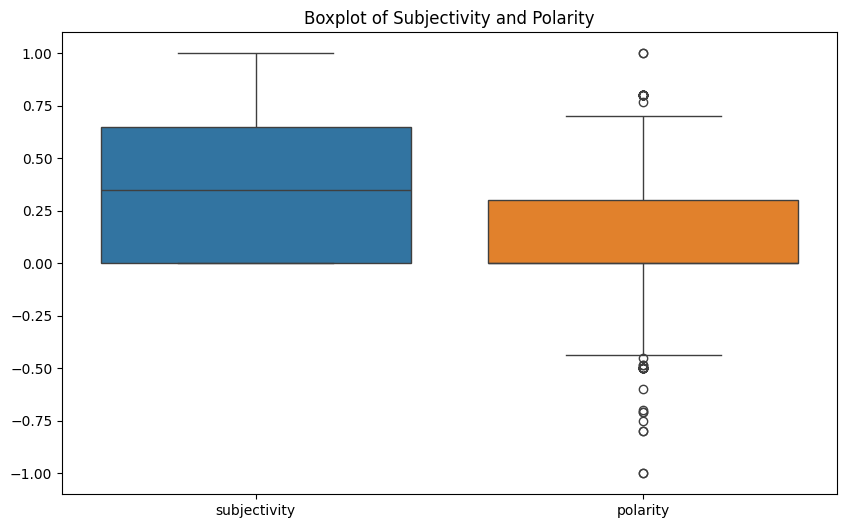

In [19]:
# prompt: boxplot for dffilter i.e. subjectivity and polarity

plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['subjectivity', 'polarity']])
plt.title('Boxplot of Subjectivity and Polarity')
plt.show()


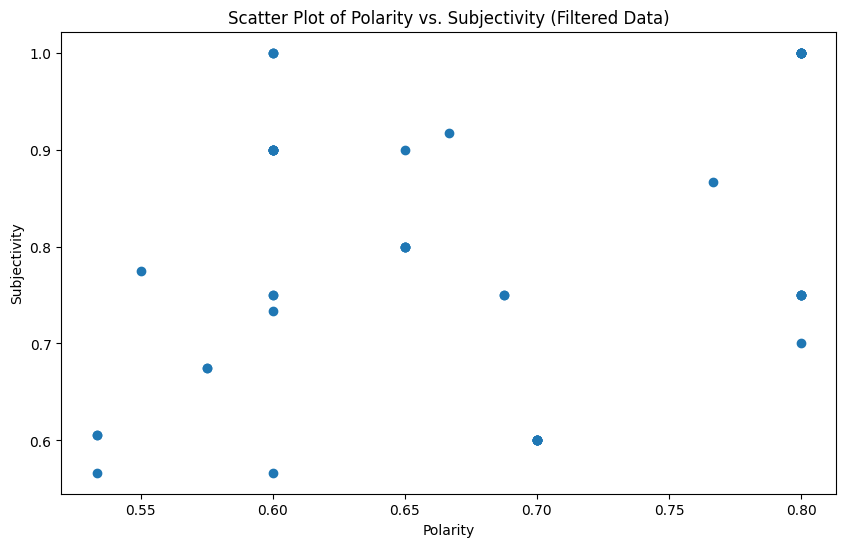

In [20]:
# prompt: scatter for dffilter

dffilter = data[(data.polarity > 0.5) & (data.subjectivity > 0.5)]

plt.figure(figsize=(10, 6))
plt.scatter(dffilter.polarity, dffilter.subjectivity)
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.title('Scatter Plot of Polarity vs. Subjectivity (Filtered Data)')
plt.show()


In [21]:
# prompt: calculate the covariance between two variables

covariance_matrix = data[['polarity', 'subjectivity']].cov()
print(covariance_matrix)


              polarity  subjectivity
polarity      0.100458      0.023991
subjectivity  0.023991      0.123516


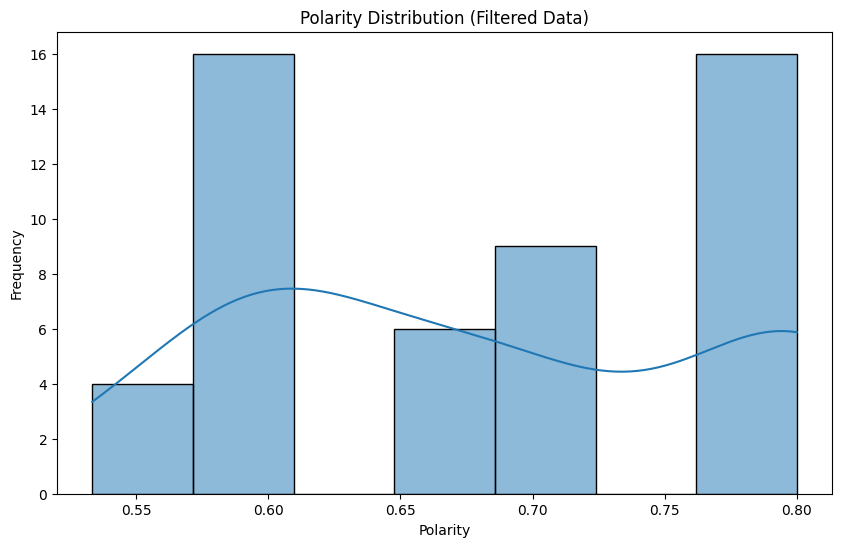

In [22]:
# prompt: Polarity Distribution for dffilter

plt.figure(figsize=(10, 6))
sns.histplot(dffilter['polarity'], kde=True)
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.title('Polarity Distribution (Filtered Data)')
plt.show()


<ipython-input-23-992fcfbb6aca>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['polarity'], shade=True)


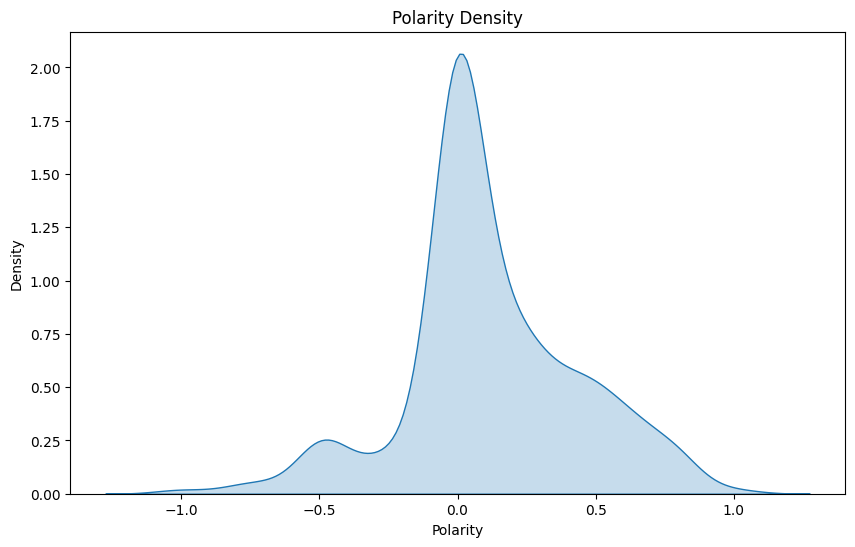

In [23]:
# prompt: plot polarity density

plt.figure(figsize=(10, 6))
sns.kdeplot(data['polarity'], shade=True)
plt.xlabel('Polarity')
plt.ylabel('Density')
plt.title('Polarity Density')
plt.show()


day: 53
love: 33
know: 31
like: 29
going: 28
go: 26
happy: 24
today: 23
really: 22
back: 21
good: 19
got: 19
im: 19
want: 17
tomorrow: 16
u: 16
time: 15
amazing: 15
new: 15
need: 15


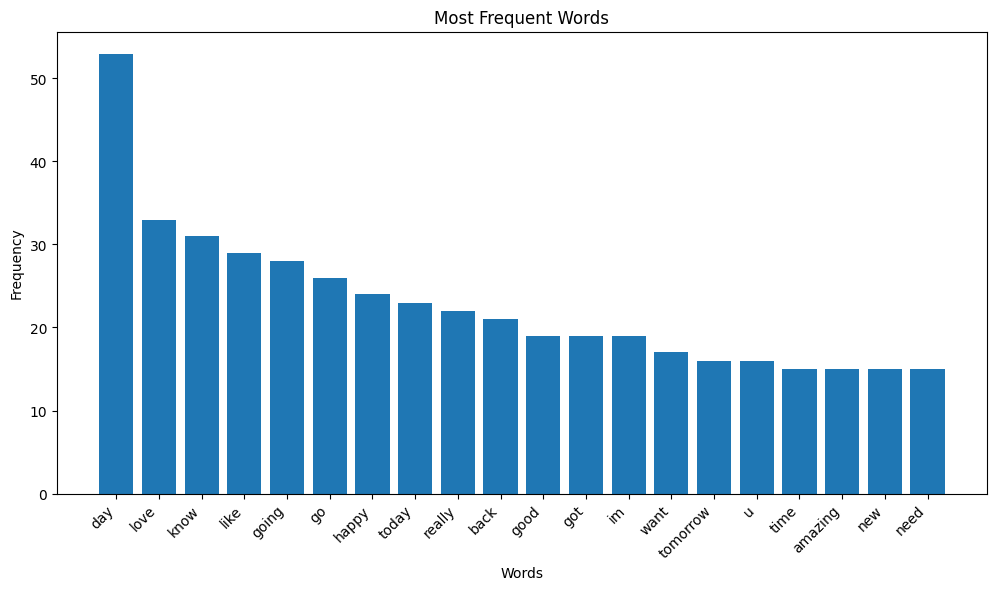

In [24]:
# prompt: Word Frequency of words from above

from collections import Counter

# Combine all text into a single string
all_text = ' '.join(data['text'].tolist())

# Tokenize the text into words
words = word_tokenize(all_text)

# Count the frequency of each word
word_counts = Counter(words)

# Get the most common words
most_common_words = word_counts.most_common(20)  # You can adjust the number of words

# Print the word frequencies
for word, count in most_common_words:
    print(f"{word}: {count}")


# Optional: Create a bar chart of word frequencies
plt.figure(figsize=(12, 6))
plt.bar(*zip(*most_common_words))
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Frequent Words')
plt.xticks(rotation=45, ha='right')
plt.show()


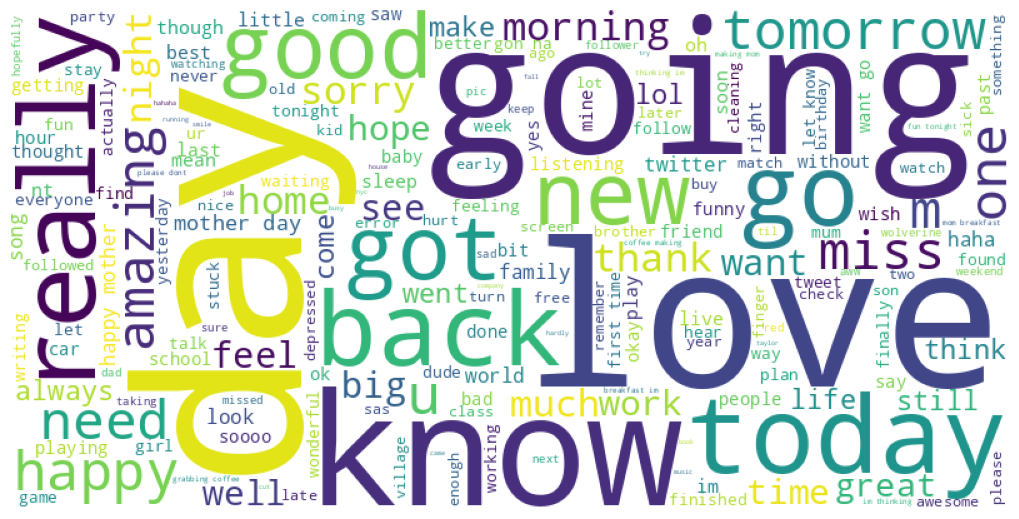

In [25]:
# prompt: draw Word Cloud

from wordcloud import WordCloud

# Combine all text into a single string
all_text = ' '.join(data['text'].tolist())

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()


In [26]:
# prompt: implement sentiment analysis using random forest method

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming you have a 'sentiment' column in your data indicating positive/negative sentiment
# You might need to adjust this based on your dataset and how sentiment is labeled
# For example, you can use a threshold on 'polarity' to create a binary sentiment column

# Define a function to classify sentiment based on polarity
def classify_sentiment(polarity):
  if polarity >= 0:
    return 1  # Positive
  else:
    return 0  # Negative

data['sentiment'] = data['polarity'].apply(classify_sentiment)

# Split the data into training and testing sets
X = data['text']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert text data to numerical features using TF-IDF vectorization
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_vec, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))



Accuracy: 0.86

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.33      0.46        18
           1       0.87      0.98      0.92        82

    accuracy                           0.86       100
   macro avg       0.81      0.65      0.69       100
weighted avg       0.85      0.86      0.84       100


Confusion Matrix:
[[ 6 12]
 [ 2 80]]
